# Importing main libraries for analysis

In [ ]:
import matplotlib.pyplot as plt
import os
import pandas as pd
import numpy as np
import re
import seaborn as sns
import glob
import imageio
from sklearn.feature_extraction import image
import json

# Import data for analysis

In [ ]:
trl_df=pd.read_excel(r'C:\Users\aczd087\Downloads/organ_blob_dimension_info.xlsx')

# Pre process data for analysis 

In [ ]:
file_types=trl_df['image_type'].unique()
pat_nos=trl_df['patient_id'].unique()
org_types=trl_df['organ_type'].unique()



In [ ]:
trl_df.keys()

In [ ]:
file_types

In [ ]:
grouped_img_type_vs_org = trl_df.groupby(['image_type', 'organ_type']).agg({'tmp_area': ['mean','min','max','var']})
grouped_img_type_vs_org

# Visualise results for analysis organ analysis

In [ ]:
grouped_img_type_vs_org_slice_id = trl_df.groupby(['image_type', 'organ_type','slice_id']).agg({'tmp_area': ['mean','min','max','var']})
grouped_img_type_vs_org_slice_id

In [ ]:
sns.catplot(ax=ax,x='image_type',y='tmp_area',hue='organ_type',data=trl_df,kind='box')
ax.set_xlabel('Image type',fontsize=20)
ax.set_ylabel('Organ contour area (pixel values)',fontsize=20)
figure.savefig('boxplot_img_type_vs_tmp_area_vs_org_type.jpeg',dpi=dpi_sp)

In [ ]:
trl_df.loc[(trl_df['image_type']=='t2spir_data')&(trl_df['image_type']=='t1dual_inphase'),:]

In [ ]:
gen_boxplot(trl_df[(trl_df['image_type']=='t1dual_inphase')|(trl_df['image_type']=='t2spir_data')],
            'image_type','tmp_area','Image type','Organ contour area (pixel values)',
            'boxplot_img_type_2_vs_tmp_area_vs_org_type.jpeg','organ_type',fig_dim=(20,20),
                dpi_sp=600,fontsize_sp=25,tick_f_size_sp=20)

In [ ]:
gen_boxplot(trl_df,'image_type','tmp_area','Image type','Organ contour area (pixel values)',
            'boxplot_img_type_vs_tmp_area_vs_org_type.jpeg','organ_type',fig_dim=(20,20),
                dpi_sp=600,fontsize_sp=25,tick_f_size_sp=20)

gen_boxplot(trl_df[trl_df['image_type']=='t1dual_outphase'],'patient_id','tmp_area',
            'Image type','Organ contour area (pixel values)',
            'boxplot_t1dual_outphase_pat_id_vs_tmp_area_vs_org_type.jpeg',
            'organ_type',fig_dim=(20,20),dpi_sp=600,fontsize_sp=25,tick_f_size_sp=20)

gen_boxplot(trl_df[trl_df['image_type']=='t1dual_inphase'],'patient_id','tmp_area',
            'Image type','Organ contour area (pixel values)',
            'boxplot_t1dual_inphase_pat_id_vs_tmp_area_vs_org_type.jpeg',
            'organ_type',fig_dim=(20,20),dpi_sp=600,fontsize_sp=25,tick_f_size_sp=20)

gen_boxplot(trl_df[trl_df['image_type']=='t2spir_data'],'patient_id','tmp_area',
            'Image type','Organ contour area (pixel values)',
            'boxplot_t2spir_pat_id_vs_tmp_area_vs_org_type.jpeg',
            'organ_type',fig_dim=(20,20),dpi_sp=600,fontsize_sp=25,tick_f_size_sp=20)

In [ ]:
gen_lineplot(trl_df[trl_df['image_type']=='t1dual_outphase'],
             'patient_id','tmp_area','Patient ID','Organ contour area (pixel values)',
             'lineplot_t1dual_outphase_pat_id_vs_tmp_area_vs_org_type.jpeg','organ_type',
                 fig_dim=(20,20),dpi_sp=600,fontsize_sp=20,tick_f_size_sp=16)

gen_lineplot(trl_df[trl_df['image_type']=='t1dual_inphase'],
             'patient_id','tmp_area','Patient ID','Organ contour area (pixel values)',
             'lineplot_t1dual_inphase_pat_id_vs_tmp_area_vs_org_type.jpeg','organ_type',
                 fig_dim=(20,20),dpi_sp=600,fontsize_sp=20,tick_f_size_sp=16)

gen_lineplot(trl_df[trl_df['image_type']=='t2spir_data'],
             'patient_id','tmp_area','Patient ID','Organ contour area (pixel values)',
             'lineplot_t2spir_inphase_pat_id_vs_tmp_area_vs_org_type.jpeg','organ_type',
                 fig_dim=(20,20),dpi_sp=600,fontsize_sp=20,tick_f_size_sp=16)

In [ ]:
gen_lineplot(trl_df[trl_df['image_type']=='t1dual_outphase'],
             'slice_id','tmp_area','MRI Slice No','Organ contour area (pixel values)',
             'lineplot_t1dual_outphase_slc_no_vs_tmp_area_vs_org_type.jpeg','organ_type',
                 fig_dim=(20,20),dpi_sp=600,fontsize_sp=20,tick_f_size_sp=16)

gen_lineplot(trl_df[trl_df['image_type']=='t1dual_inphase'],
             'slice_id','tmp_area','MRI Slice No','Organ contour area (pixel values)',
             'lineplot_t1dual_inphase_slc_no_vs_tmp_area_vs_org_type.jpeg','organ_type',
                 fig_dim=(20,20),dpi_sp=600,fontsize_sp=20,tick_f_size_sp=16)

gen_lineplot(trl_df[trl_df['image_type']=='t2spir_data'],
             'slice_id','tmp_area','MRI Slice No','Organ contour area (pixel values)',
             'lineplot_t2spir_inphase_slc_no_vs_tmp_area_vs_org_type.jpeg','organ_type',
                 fig_dim=(20,20),dpi_sp=600,fontsize_sp=20,tick_f_size_sp=16)

In [ ]:
def gen_boxplot(df_set,x_val_col,y_val_col,xlabel,ylabel,fig_f_name,hue_col=None,fig_dim=(20,20),
                dpi_sp=600,fontsize_sp=20,tick_f_size_sp=30):
    """the purpose of this method i sto generate boxplots in a uniform manner"""
    
    fig, ax=plt.subplots(figsize=fig_dim)

    sns.catplot(ax=ax,x=x_val_col,y=y_val_col,hue=hue_col,data=df_set,kind='box')
    #Generate x and y labels
    ax.legend(fontsize='22', title_fontsize='20')
    ax.set_xlabel(xlabel,fontsize=fontsize_sp)
    ax.set_ylabel(ylabel,fontsize=fontsize_sp)
    ax.tick_params(labelsize=tick_f_size_sp)
    
    figure = ax.get_figure()    
    figure.savefig(fig_f_name,dpi=dpi_sp)
    

In [ ]:
def gen_lineplot(df_set,x_val_col,y_val_col,xlabel,ylabel,fig_f_name,hue_col=None,
                 fig_dim=(20,20),dpi_sp=600,fontsize_sp=20,tick_f_size_sp=16):
    
    fig, ax=plt.subplots(figsize=fig_dim)
    
        
    sns.lineplot(ax=ax,x=x_val_col,y=y_val_col,hue=hue_col,data=df_set)
    
    
    ax.legend(fontsize='22', title_fontsize='20')
    ax.set_xlabel(xlabel,fontsize=fontsize_sp)
    ax.set_ylabel(ylabel,fontsize=fontsize_sp)
    ax.tick_params(labelsize=tick_f_size_sp)
    
    figure = ax.get_figure()    
    figure.savefig(fig_f_name,dpi=dpi_sp)
    


In [ ]:
def bytescaling(data, cmin=None, cmax=None, high=255, low=0):
    """
    Converting the input image to uint8 dtype and scaling
    the range to ``(low, high)`` (default 0-255). If the input image already has 
    dtype uint8, no scaling is done.
    :param data: 16-bit image data array
    :param cmin: bias scaling of small values (def: data.min())
    :param cmax: bias scaling of large values (def: data.max())
    :param high: scale max value to high. (def: 255)
    :param low: scale min value to low. (def: 0)
    :return: 8-bit image data array
    """
    if data.dtype == np.uint8:
        return data

    if high > 255:
        high = 255
    if low < 0:
        low = 0
    if high < low:
        raise ValueError("`high` should be greater than or equal to `low`.")

    if cmin is None:
        cmin = data.min()
    if cmax is None:
        cmax = data.max()

    cscale = cmax - cmin
    if cscale == 0:
        cscale = 1

    scale = float(high - low) / cscale
    bytedata = (data - cmin) * scale + low
    return (bytedata.clip(low, high) + 0.5).astype(np.uint8)

# Visualise results for Organ intensity

In [ ]:
img_types=['t2spir','t1dual_inphase','t1dual_outphase']
organs=['background','liver','right kidney','left kidney','r_kidney','spleen','l_kidney']
Pat_str='patient_id_'
pat_id_lst=['t1d','t2s']
dir_pth='F:\Biomedical images\Train\mask_orgn_spec_img'

In [ ]:
def div_patches_img(tmp_img_255,pat_size=(3,3)):
    """The purpose of this method is to divide patch of an imageinto sections and filter off mainly black background pieces
    for variance mean etc statisitcal analysis."""
    patches = image.extract_patches_2d(tmp_img_255, pat_size)
    bool_set=np.any(patches!=0,axis=(1,2))
    return patches[bool_set,:,:]

def np_stat_sum(tmp_img_pat):
    """The purpose of this method is to perform statical analysis in regards to numpy statisicall summayr analysis"""
    
    return (tmp_img_pat.mean(),np.median(tmp_img_pat),np.var(tmp_img_pat.flatten()),
           np.min(tmp_img_pat),np.max(tmp_img_pat))

In [ ]:
def dict_concat_np(dict_set,array_key,array):
    """The purpose of this method is to perform numpy concatenation between arrays"""
    
    if array_key in dict_set.keys():        
        dict_set[array_key]=np.concatenate((dict_set[array_key],
                                           array.flatten()))
    else:
        dict_set[array_key]=array.flatten()
        
    return dict_set

def gen_np_dict(dict_set,dict_name):
    """Generate dictionary set json"""
    np.save(dict_name,dict_set)

In [ ]:
#Iterate through for files in directory path. 
Analysis_lst=[]

per_img_pat_org={}
per_img_slc_org={}
per_img_org={}

for file in glob.glob(dir_pth+'/*.png'):
    #print(file)
    tmp_img=imageio.imread(file)
    
    img=[x for x in img_types if file.lower().find(x)!=-1]
    organ=[y for y in organs if file.lower().find(y)!=-1]
    #Patient id determined from 
    file_idx=[file.lower().find(x) for x in pat_id_lst if file.lower().find(x)!=-1]
    Pat_id_act=file[file.lower().find(Pat_str)+len(Pat_str):file_idx[0]]
    #Getting slice no from file name
    slic_no_uppr_bnd=file.lower().find('uint8.png')
    slic_no_lwr_bnd=file.lower().rfind('mask_')
    slice_no=file[slic_no_lwr_bnd+len('mask_'):slic_no_uppr_bnd]
    
        #Dividing image into patches
    tmp_img_pat=div_patches_img(tmp_img)
    try:        
        #Getting statistics
        mean,median,var,min_val,max_val=np_stat_sum(tmp_img_pat)
        #Generating list for analysis
        
        
    except ValueError as e:
        print('val error')
        print(tmp_img_pat.shape)
        tmp_img_pat=div_patches_img(tmp_img,(2,2))
        print(tmp_img_pat.shape)
        if tmp_img_pat.shape[0]!=0:
            #Getting statistics
            mean,median,var,min_val,max_val=np_stat_sum(tmp_img_pat)
        else:
            tmp_img_pat=div_patches_img(tmp_img,(1,1))
            #mean,median,var,min_val,max_val=np_stat_sum(tmp_img_pat)
    
    
    img_pat_org_key=img[0]+'_'+organ[0]+'_'+Pat_id_act
    img_pat_slc_key=img[0]+'_'+organ[0]+'_'+slice_no
    per_img_org_key=img[0]+'_'+organ[0]
    
    per_img_pat_org=dict_concat_np(per_img_pat_org,img_pat_org_key,tmp_img_pat)
    per_img_slc_org=dict_concat_np(per_img_slc_org,img_pat_slc_key,tmp_img_pat)
    per_img_org=dict_concat_np(per_img_org,per_img_org_key,tmp_img_pat)

In [ ]:

gen_np_dict(per_img_pat_org,'per_img_per_pat_org_arrs_dict.npy')
gen_np_dict(per_img_slc_org,'per_img_per_slc_org_arrs_dict.npy')
gen_np_dict(per_img_org,'per_img_org_arrs_dict.npy')

In [291]:
per_img_pat_org_idx=[]

for k,v in per_img_pat_org.items():
    #Image set for analysis
    img=[x for x in img_types if k.lower().find(x)!=-1]
    #Organ set for analysis
    organ=[y for y in organs if k.lower().find(y)!=-1]
    #Patient id 
    pat_id=int(k.split('_')[-1])
    
    #mean,median,var,min_val,max_val=np_stat_sum(v)
    
    per_img_pat_org_idx.append([img[0],organ[0],pat_id,v])
    

In [293]:
filt_df=per_img_pat_org_df[per_img_pat_org_df['image_type']=='t1dual_inphase']


In [296]:
filt_df.organ.unique()

array(['background', 'left kidney', 'liver', 'right kidney', 'spleen'],
      dtype=object)

In [297]:
flatui_palette_code= {'background':"#9b59b6",'left kidney':"#3498db",
          'right kidney':"#e74c3c",'spleen':"#34495e",'liver':"#2ecc71"}

In [301]:
colour_palette=[]

for org_types in list(filt_df.organ):
    
    colour_palette.append(flatui_palette_code[org_types])

In [314]:
#Creating custom xticks for analysis
pat_id_lst=list(filt_df['patient_id'])
pat_id_lst_subsample=[s if (i+3)%5==0 else '' for i,s in enumerate(pat_id_lst)]
          

In [ ]:
t1dual_inphase_pat_id=[key for key, value in per_img_pat_org.items() if 't1dual_inphase' in key.lower()]
t1dual_outphase_pat_id=[key for key, value in per_img_pat_org.items() if 't1dual_outphase' in key.lower()]
t2spir_pat_id=[key for key, value in per_img_pat_org.items() if 't2spir' in key.lower()]

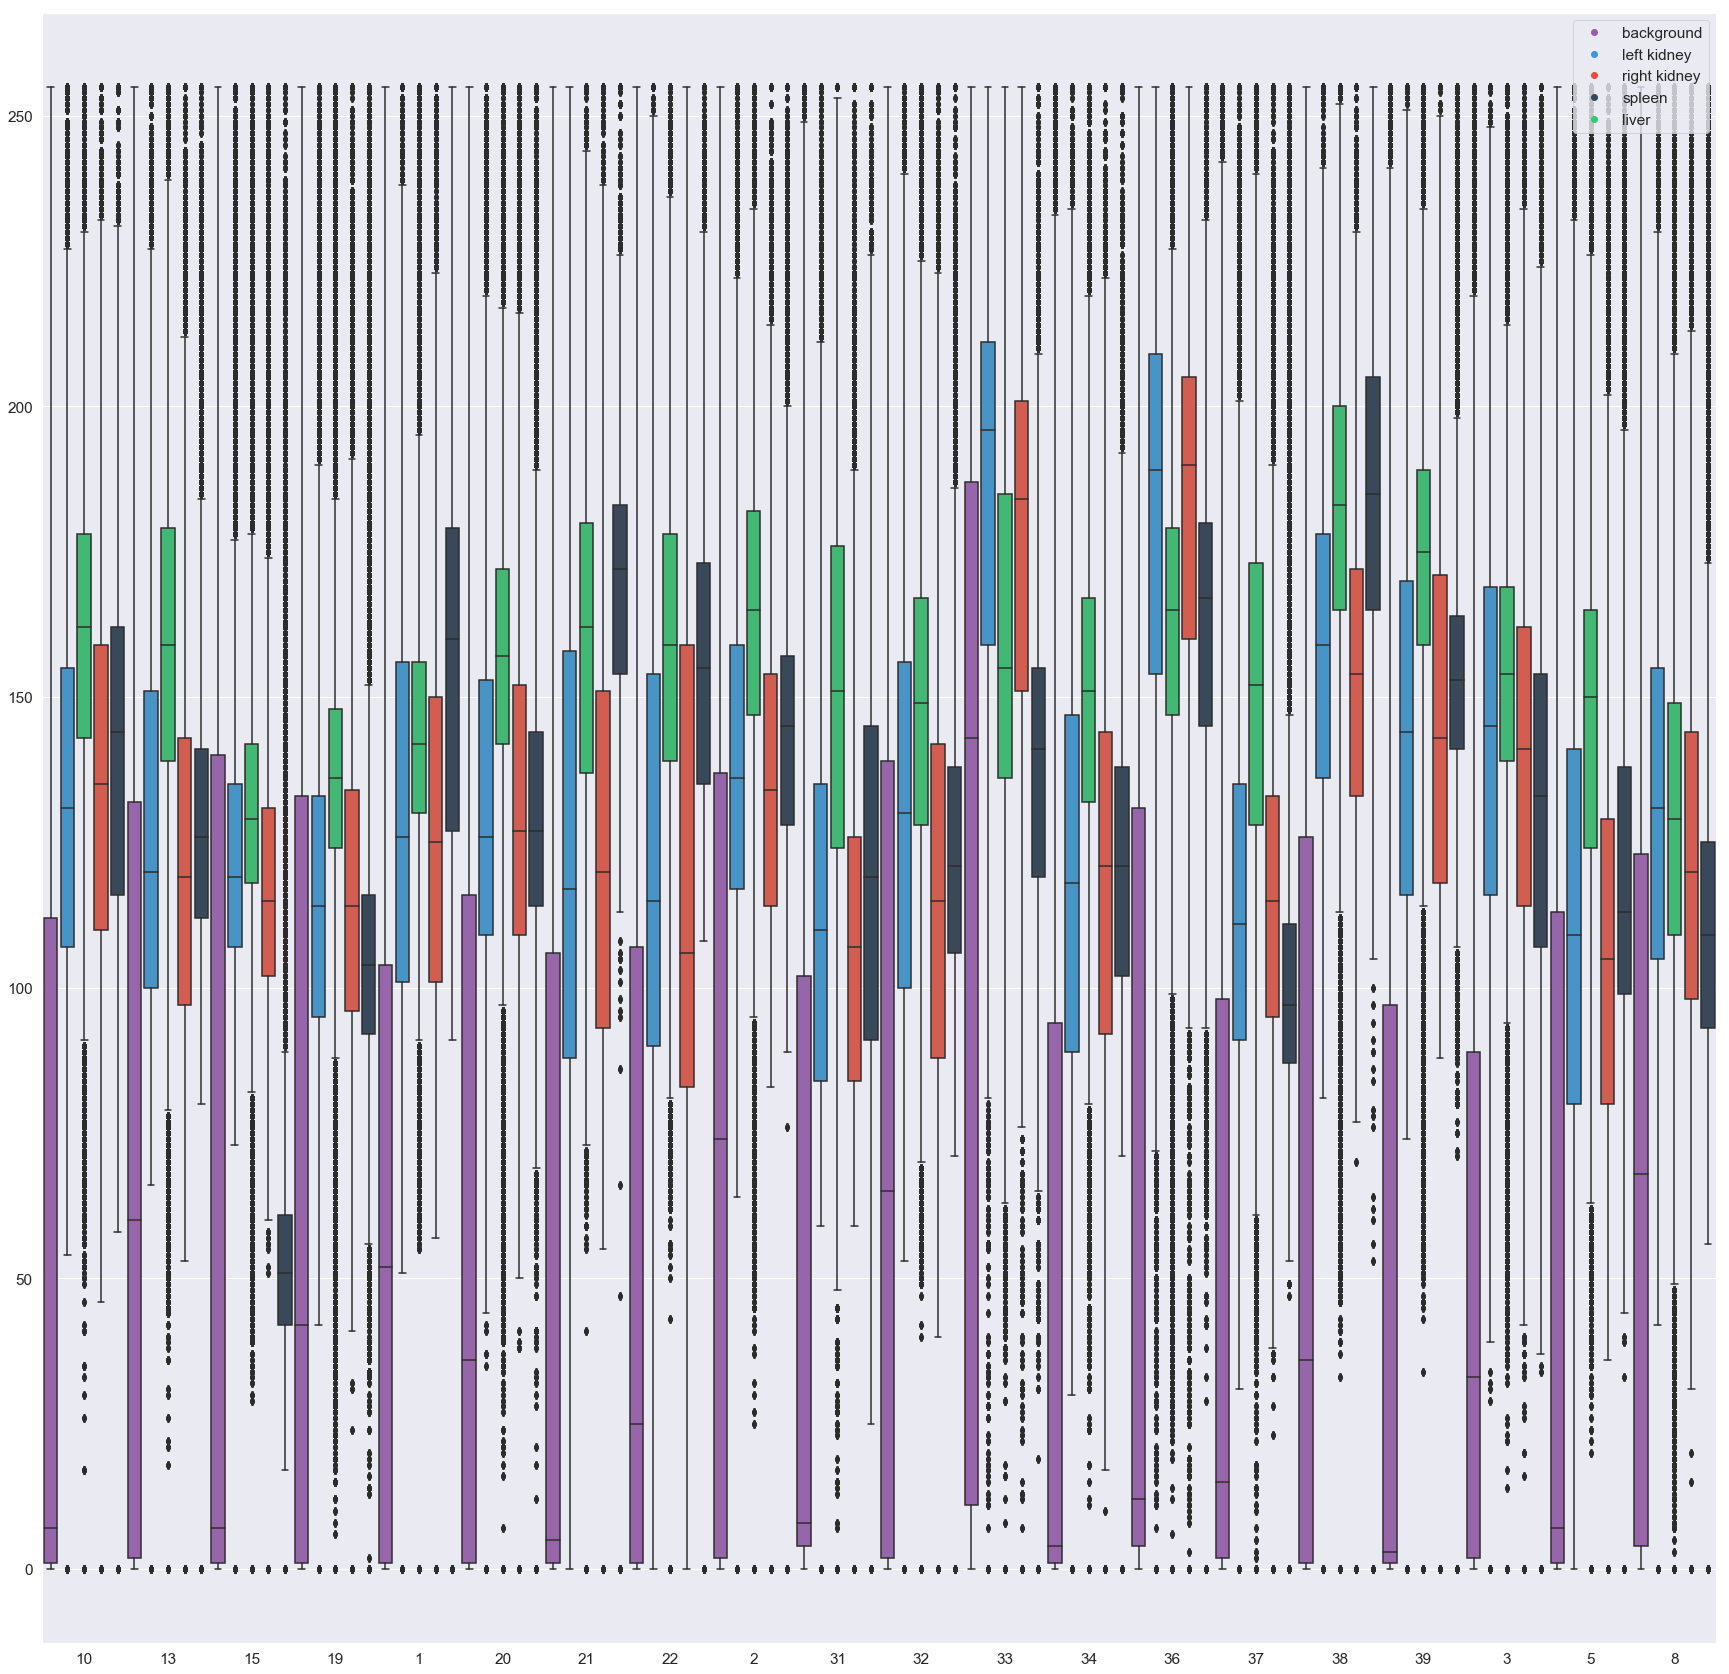

In [317]:
fig,ax=plt.subplots(figsize=(30,30))

sns.boxplot(ax=ax,data=list(filt_df['array']),palette=colour_palette)

ax.set_xticklabels(pat_id_lst_subsample)
markers = [plt.Line2D([0,0],[0,0],color=color, marker='o', linestyle='') for color in flatui_palette_code.values()]
ax.legend(markers, flatui_palette_code.keys(), numpoints=1,loc=1)

In [250]:
def gen_filt_dict(dict_orig,dict_vals):
    """The method to filter dictionary on key values for methods"""
    new_dict=dict()
    
    for vals in dict_vals:
        new_dict[vals]=dict_orig[vals]
        
    return new_dict

In [ ]:
gen_boxplot(per_img_pat_org_df,
            'image_type','array','Image type','Organ contour area (pixel values)',
            'boxplot_img_type_vs_intensity_vs_org_type.jpeg','organ',fig_dim=(20,20),
                dpi_sp=600,fontsize_sp=25,tick_f_size_sp=20)

In [ ]:
per_img_pat_org_df.to_excel('')

In [ ]:
per_img_slc_org_lst=[]
for k,v in per_img_slc_org.items():
    #Image set for analysis
    img=[x for x in img_types if k.lower().find(x)!=-1]
    #Organ set for analysis
    organ=[y for y in organs if k.lower().find(y)!=-1]
    #Patient id 
    slc_no=int(k.split('_')[-1])
    
    #mean,median,var,min_val,max_val=np_stat_sum(v)
    
    lst_set=[img[0],organ[0],pat_id] #mean,median,var,min_val,max_val
    
    for i in v.T:
        tmp_set=lst_set+[i]
        per_img_pat_org_lst.append(tmp_set)
    
    per_img_slc_org_lst.append(lst_set)

per_img_slc_no_org_df=pd.DataFrame(per_img_pat_org_lst,
                                columns=['image_type','organ','slice_no',
                                        'array'])

In [ ]:
#Iterate through for files in directory path. 
Analysis_lst=[]

for file in glob.glob(dir_pth+'/*.png'):
    
    tmp_img=imageio.imread(file)
    
    img=[x for x in img_types if file.lower().find(x)!=-1]
    organ=[y for y in organs if file.lower().find(y)!=-1]
    #Patient id determined from 
    file_idx=[file.lower().find(x) for x in pat_id_lst if file.lower().find(x)!=-1]
    Pat_id_act=int(file[file.lower().find(Pat_str)+len(Pat_str):file_idx[0]])
    #Getting slice no from file name
    slic_no_uppr_bnd=file.lower().find('uint8.png')
    slic_no_lwr_bnd=file.lower().rfind('mask_')
    slice_no=int(file[slic_no_lwr_bnd+len('mask_'):slic_no_uppr_bnd])
    
    #Dividing image into patches
    tmp_img_pat=div_patches_img(tmp_img)
    try:        
        #Getting statistics
        mean,median,var,min_val,max_val=np_stat_sum(tmp_img_pat)
        #Generating list for analysis
        
        
    except ValueError as e:
        print('val error')
        print(tmp_img_pat.shape)
        tmp_img_pat=div_patches_img(tmp_img,(2,2))
        print(tmp_img_pat.shape)
        if tmp_img_pat.shape[0]!=0:
            #Getting statistics
            mean,median,var,min_val,max_val=np_stat_sum(tmp_img_pat)
        else:
            tmp_img_pat=div_patches_img(tmp_img,(1,1))
            mean,median,var,min_val,max_val=np_stat_sum(tmp_img_pat)
    
    Analysis_lst.append([img[0],organ[0],Pat_id_act,slice_no,mean,median,var,np.sqrt(var),min_val,max_val])

In [ ]:
org_int_spec_summary_data=pd.DataFrame(Analysis_lst,columns=['image_type','organ_type','pat_id','slice_no',
                                                             'mean','median','variance','std_dev','min','max'])
org_int_spec_summary_data.to_excel('org_int_specific_summary_data.xlsx')

In [ ]:
org_int_spec_summary_data['image_type'].unique()

In [ ]:
gen_boxplot(org_int_spec_summary_data,
            'image_type','mean','Image type','Mean 8 bit pixel intensities',
            'boxplot_img_type_vs_mean_int_vs_org_type.jpeg','organ_type',fig_dim=(20,20),
                dpi_sp=600,fontsize_sp=25,tick_f_size_sp=20)

In [ ]:
gen_boxplot(org_int_spec_summary_data,
            'image_type','median','Image type','Median 8 bit pixel intensities',
            'boxplot_img_type_vs_median_int_vs_org_type.jpeg','organ_type',fig_dim=(20,20),
                dpi_sp=600,fontsize_sp=25,tick_f_size_sp=20)

In [ ]:
gen_boxplot(org_int_spec_summary_data[org_int_spec_summary_data['image_type']=='t1dual_inphase'],
            'pat_id','median','Patient ID','Median 8 bit pixel intensities',
            'boxplot_t1dual_inphase_patient_id_vs_median_int_vs_org_type.jpeg','organ_type',fig_dim=(20,20),
                dpi_sp=600,fontsize_sp=25,tick_f_size_sp=20)

In [ ]:
gen_lineplot(org_int_spec_summary_data[org_int_spec_summary_data['image_type']=='t1dual_inphase'],
            'pat_id','median','Patient ID','Median 8 bit pixel intensities',
            'lineplot_t1dual_inphase_patient_id_vs_median_int_vs_org_type.jpeg','organ_type',fig_dim=(20,20),
                dpi_sp=600,fontsize_sp=25,tick_f_size_sp=20)

In [ ]:
gen_boxplot(org_int_spec_summary_data[org_int_spec_summary_data['image_type']=='t1dual_outphase'],
            'pat_id','median','Patient ID','Median 8 bit pixel intensities',
            'boxplot_t1dual_outphase_patient_id_vs_median_int_vs_org_type.jpeg','organ_type',fig_dim=(20,20),
                dpi_sp=600,fontsize_sp=25,tick_f_size_sp=20)

In [ ]:
gen_boxplot(org_int_spec_summary_data[org_int_spec_summary_data['image_type']=='t2spir'],
            'pat_id','median','Patient ID','Median 8 bit pixel intensities',
            'boxplot_t2spir_patient_id_vs_median_int_vs_org_type.jpeg','organ_type',fig_dim=(20,20),
                dpi_sp=600,fontsize_sp=25,tick_f_size_sp=20)